In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def prepare_df():

    file_path = '/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/Final Project/Muffintown_Final/Query.xlsx'
    df = pd.read_excel(file_path)
    
    # Converting columns to Datetime
    df['Start of Batch Date/Time'] = pd.to_datetime(df['Start of Batch Date/Time'])
    df['End of Batch Date/Time'] = pd.to_datetime(df['End of Batch Date/Time'])

    # Calculating the batch length in hours
    df['Batch Length (Hours)'] = (df['End of Batch Date/Time'] - df['Start of Batch Date/Time']).dt.total_seconds() / 3600

    # Creating Units per Hour Column
    df['Units Per Hour'] = df['Batch Count'] / df['Batch Length (Hours)']

    # Remove rows with missing values in 'Optimal Cases Per Hour' column
    df.dropna(subset=['Optimal Cases Per Hour'], inplace=True)

    compliant_df = df[(df['Units Per Hour'] >= df['Lower Target']) & (df['Units Per Hour'] <= df['Upper Target'])]
    non_compliant_df = df[(df['Units Per Hour'] < df['Lower Target']) | (df['Units Per Hour'] > df['Upper Target'])]

    total_observations = len(df)
    print(total_observations)
    pct_compliant = 100 * round(len(compliant_df)/total_observations,2)
    pct_non_compliant = 100 * round(len(non_compliant_df)/total_observations,2)

    print(f'The number of compliant observations is: {len(compliant_df)} or {pct_compliant} percent.')
    print(f'The number of non-compliant observations is: {len(non_compliant_df)} or {pct_non_compliant} percent.')

    return df

initial_df = prepare_df()


2939
The number of compliant observations is: 429 or 15.0 percent.
The number of non-compliant observations is: 2510 or 85.0 percent.


,Equipment ID,Group Name,Date,Current Job,Start of Batch Date/Time,End of Batch Date/Time,Batch Count,User1,LINE -LOCATION (Eqp Code),Optimal Cases Per Hour,Lower Target,Upper Target,Batch Length (Hours),Units Per Hour
0,20,LAWRENCE AUTOBAKE,2020-08-24,96605,2020-08-24 12:20:32,2020-08-24 19:42:41,2445,96605,EQP-LAWPACK1,347.0,312.3,381.7,7.369167,331.787855
1,20,LAWRENCE AUTOBAKE,2020-08-24,24970,2020-08-24 19:42:41,2020-08-24 20:00:05,3,24970,EQP-LAWPACK1,364.0,327.6,400.4,0.290000,10.344828
2,20,LAWRENCE AUTOBAKE,2020-08-24,7910,2020-08-24 20:00:05,2020-08-24 20:19:10,49,7910,EQP-LAWPACK1,349.0,314.1,383.9,0.318056,154.061135
3,20,LAWRENCE AUTOBAKE,2020-08-25,24970,2020-08-24 20:19:11,2020-08-25 06:54:17,504,24970,EQP-LAWPACK1,364.0,327.6,400.4,10.585000,47.614549
4,20,LAWRENCE AUTOBAKE,2020-08-25,27805,2020-08-25 06:54:18,2020-08-25 15:17:31,2087,27805,EQP-LAWPACK1,260.0,234.0,286.0,8.386944,248.839135


{'SKU': '96605', 'Number of Records': 82, 'Percentage of Compliant Records': 11.0, 'Average Units Per Hour': 212.3, 'Standard Deviation of Units Per Hour': 108.72}
{'SKU': '24970', 'Number of Records': 49, 'Percentage of Compliant Records': 18.0, 'Average Units Per Hour': 218.12, 'Standard Deviation of Units Per Hour': 121.05}


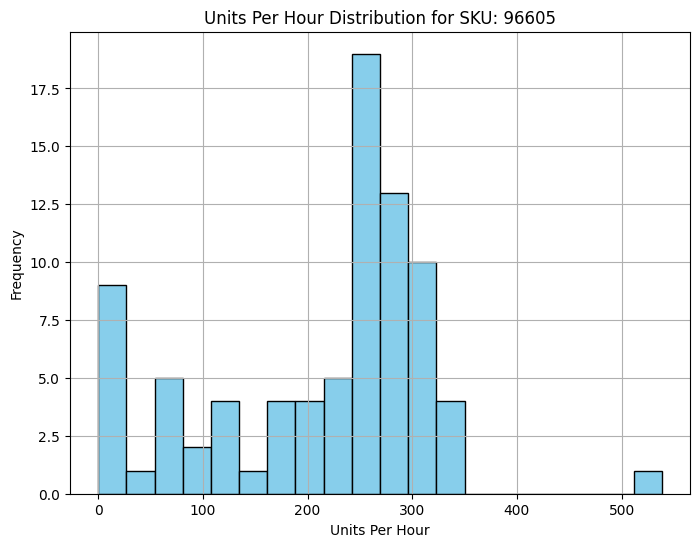

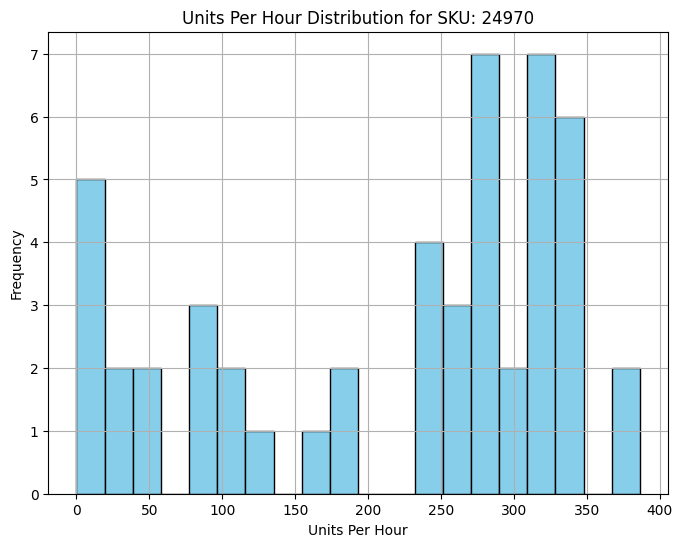

In [17]:
def analyze_sku(df, skus):
    analysis_results = []
    
    for sku in skus:

        df['Current Job'] = df['Current Job'].astype(str)

        # Filter by the current SKU
        filtered_df = df[df['Current Job'] == sku]
        
        # Number of records for the SKU
        records = len(filtered_df)
        
        # Percentage of compliant records for the SKU
        compliant_records = len(filtered_df[(filtered_df['Units Per Hour'] >= filtered_df['Lower Target']) & 
                                                (filtered_df['Units Per Hour'] <= filtered_df['Upper Target'])])
        
        compliance_percentage = round((compliant_records / records),2) * 100 if records != 0 else 0
        
        # Average units per hour of the SKU
        avg_units_per_hour = round(filtered_df['Units Per Hour'].mean(),2)
        
        # Standard deviation of units per hour of the SKU
        stdev_units_per_hour = round(filtered_df['Units Per Hour'].std(),2)

        # Plot histogram of units per hour for the SKU
        plt.figure(figsize=(8, 6))
        plt.hist(filtered_df['Units Per Hour'], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Units Per Hour Distribution for SKU: {sku}')
        plt.xlabel('Units Per Hour')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.savefig(f'{sku}_histogram.png')

        analysis_results.append({
            'SKU': sku,
            'Number of Records': records,
            'Percentage of Compliant Records': compliance_percentage,
            'Average Units Per Hour': avg_units_per_hour,
            'Standard Deviation of Units Per Hour': stdev_units_per_hour
        })
    
    return analysis_results

skus = ['96605', '24970']
sku_results = analyze_sku(initial_df, skus)
for result in sku_results:
    print(result)


In [18]:
def analyze_group(df, group_names):
    analysis_results = []
    
    for group_name in group_names:
        # Filter by the current Group Name
        filtered_df = df[df['Group Name'] == group_name]
        
        # Number of records for the Group Name
        records = len(filtered_df)
        
        # Percentage of compliant records for the Group Name
        compliant_records = len(filtered_df[(filtered_df['Units Per Hour'] >= filtered_df['Lower Target']) & 
                                                (filtered_df['Units Per Hour'] <= filtered_df['Upper Target'])])
        compliance_percentage = round((compliant_records / records),2) * 100 if records != 0 else 0
        
        analysis_results.append({
            'Group Name': group_name,
            'Number of Records': records,
            'Percentage of Compliant Records': compliance_percentage,
        })
    
    return analysis_results

group_names = ['LAWRENCE AUTOBAKE', 'LAWRENCE - SW PACK']
group_results = analyze_group(initial_df, group_names)
for result in group_results:
    print(result)


{'Group Name': 'LAWRENCE AUTOBAKE', 'Number of Records': 2200, 'Percentage of Compliant Records': 19.0}
{'Group Name': 'LAWRENCE - SW PACK', 'Number of Records': 471, 'Percentage of Compliant Records': 1.0}


In [21]:
def analyze_sku_and_group(df, skus, group_names):
    analysis_results = []
    
    for sku in skus:
        for group_name in group_names:
            # Filter by the current SKU and Group Name
            filtered_df = df[(df['Current Job'] == sku) & (df['Group Name'] == group_name)]
            
            # Number of records for the SKU and Group Name combination
            num_records = len(filtered_df)
            
            # Percentage of compliant records for the SKU and Group Name combination
            num_compliant_records = len(filtered_df[(filtered_df['Units Per Hour'] >= filtered_df['Lower Target']) & 
                                                    (filtered_df['Units Per Hour'] <= filtered_df['Upper Target'])])
            
            compliance_pct = round((num_compliant_records / num_records) * 100,2) if num_records != 0 else 0
            
            # Average units per hour of the SKU and Group Name combination
            avg_units_per_hour = round(filtered_df['Units Per Hour'].mean(),2)
            
            # Standard deviation of units per hour of the SKU and Group Name combination
            stdev_units_per_hour = round(filtered_df['Units Per Hour'].std(),2)
            
            analysis_results.append({
                'SKU': sku,
                'Group Name': group_name,
                'Number of Records': num_records,
                'Percentage of Compliant Records': compliance_pct,
                'Average Units Per Hour': avg_units_per_hour,
                'Standard Deviation of Units Per Hour': stdev_units_per_hour
            })
    
    return analysis_results

skus = ['96605', '24970']
group_names = ['LAWRENCE AUTOBAKE', 'LAWRENCE - SW PACK']
analysis_results = analyze_sku_and_group(initial_df, skus, group_names)

for result in analysis_results:
    print(result)


{'SKU': '96605', 'Group Name': 'LAWRENCE AUTOBAKE', 'Number of Records': 82, 'Percentage of Compliant Records': 10.98, 'Average Units Per Hour': 212.3, 'Standard Deviation of Units Per Hour': 108.72}
{'SKU': '96605', 'Group Name': 'LAWRENCE - SW PACK', 'Number of Records': 0, 'Percentage of Compliant Records': 0, 'Average Units Per Hour': nan, 'Standard Deviation of Units Per Hour': nan}
{'SKU': '24970', 'Group Name': 'LAWRENCE AUTOBAKE', 'Number of Records': 47, 'Percentage of Compliant Records': 19.15, 'Average Units Per Hour': 222.7, 'Standard Deviation of Units Per Hour': 120.69}
{'SKU': '24970', 'Group Name': 'LAWRENCE - SW PACK', 'Number of Records': 0, 'Percentage of Compliant Records': 0, 'Average Units Per Hour': nan, 'Standard Deviation of Units Per Hour': nan}
